In [2]:
import glob
import matplotlib.pyplot as plt
import pickle
import xarray as xr

from salishsea_tools import places

%matplotlib inline

/home/sallen/anaconda/envs/py38/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/sallen/anaconda/envs/py38/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [24]:
ds = []
for filename in glob.glob('/results2/SalishSea/nowcast-green.201905/0[12]nov15/SalishSea_1h_*_grid_T.nc'):
    print(filename)
    data = xr.open_dataset(filename)
    data_extract = data.isel(deptht = 0, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
    datamean = data_extract.resample(time_counter='1d').mean()
    ds.append(datamean)
    data.close()

/results2/SalishSea/nowcast-green.201905/01nov15/SalishSea_1h_20151101_20151101_grid_T.nc
/results2/SalishSea/nowcast-green.201905/02nov15/SalishSea_1h_20151102_20151102_grid_T.nc


In [25]:
timeseries = xr.concat(ds, dim='time_counter')

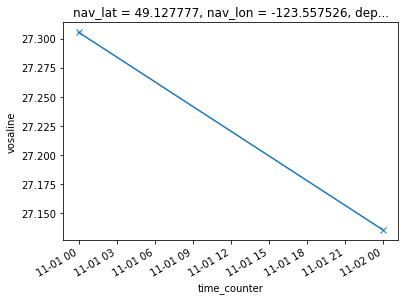

In [28]:
timeseries.vosaline.plot(marker='x');

In [38]:
hindcast = []
for filename in sorted(glob.glob('/results2/SalishSea/nowcast-green.201905/1?nov15/SalishSea_1h*grid_T*.nc')):
    print (filename)
    data = xr.open_dataset(filename)
    data_extract = data.isel(deptht = 0, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
    datamean = data_extract.resample(time_counter='1d', loffset='12h').mean()
    hindcast.append(datamean)
    data.close()
timeseries1 = xr.concat(hindcast, dim='time_counter')

/results2/SalishSea/nowcast-green.201905/10nov15/SalishSea_1h_20151110_20151110_grid_T.nc
/results2/SalishSea/nowcast-green.201905/11nov15/SalishSea_1h_20151111_20151111_grid_T.nc
/results2/SalishSea/nowcast-green.201905/12nov15/SalishSea_1h_20151112_20151112_grid_T.nc
/results2/SalishSea/nowcast-green.201905/13nov15/SalishSea_1h_20151113_20151113_grid_T.nc
/results2/SalishSea/nowcast-green.201905/14nov15/SalishSea_1h_20151114_20151114_grid_T.nc
/results2/SalishSea/nowcast-green.201905/15nov15/SalishSea_1h_20151115_20151115_grid_T.nc
/results2/SalishSea/nowcast-green.201905/16nov15/SalishSea_1h_20151116_20151116_grid_T.nc
/results2/SalishSea/nowcast-green.201905/17nov15/SalishSea_1h_20151117_20151117_grid_T.nc
/results2/SalishSea/nowcast-green.201905/18nov15/SalishSea_1h_20151118_20151118_grid_T.nc
/results2/SalishSea/nowcast-green.201905/19nov15/SalishSea_1h_20151119_20151119_grid_T.nc


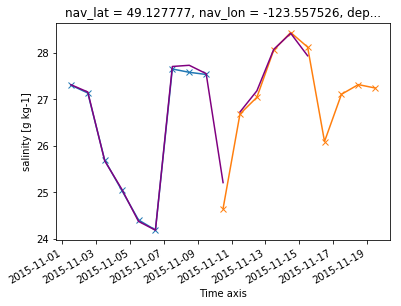

In [39]:
timeseries.vosaline.plot(marker='x')
timeseries1.vosaline.plot(marker='x')
for filename in glob.glob('/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1d*grid_T*.nc'):
    ds = xr.open_dataset(filename)
    ds.vosaline[:, 0, places.PLACES['S3']['NEMO grid ji'][0], 
                places.PLACES['S3']['NEMO grid ji'][1]].plot(color='purple')
    ds.close()
   

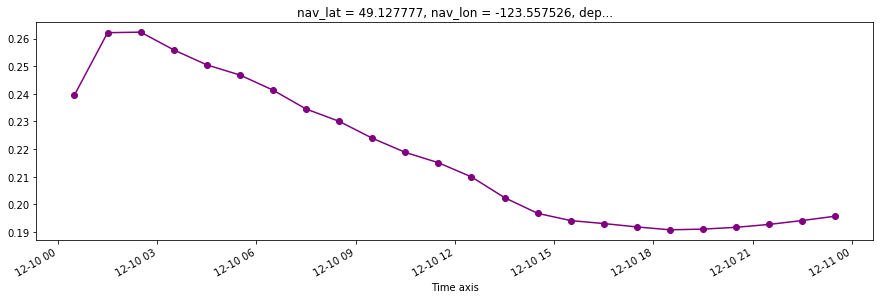

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(data_extract.diatoms+data_extract.flagellates+data_extract.ciliates).plot(color='purple', marker='o')

/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_20151210-20151210.nc
/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_20151212-20151212.nc
/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_20151115-20151115.nc
/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_20151111-20151111.nc
/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_20151221-20151221.nc
/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_20151129-20151129.nc
/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_20151201-20151201.nc
/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_20151223-20151223.nc
/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_20151205-20151205.nc
/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h_20151101_20151231_ptrc_T_2

/results2/SalishSea/nowcast-green.201905/23nov15/SalishSea_1h_20151123_20151123_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/24nov15/SalishSea_1h_20151124_20151124_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/25nov15/SalishSea_1h_20151125_20151125_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/26nov15/SalishSea_1h_20151126_20151126_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/27nov15/SalishSea_1h_20151127_20151127_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/28nov15/SalishSea_1h_20151128_20151128_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/29nov15/SalishSea_1h_20151129_20151129_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/30nov15/SalishSea_1h_20151130_20151130_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/01dec15/SalishSea_1h_20151201_20151201_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/02dec15/SalishSea_1h_20151202_20151202_ptrc_T.nc
/results2/SalishSea/nowcast-green.201905/03dec15/SalishSea_1h_20151203_20151203_ptrc_T.nc
/results2/

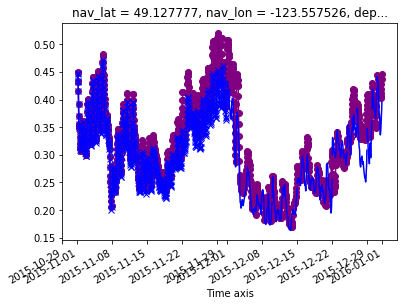

In [49]:
# November and December
for filename in glob.glob('/data/sallen/results/MEOPAR/tuning/01nov15/SalishSea_1h*ptrc_T*.nc'):
    print(filename)
    ds = xr.open_dataset(filename)
    data_extract = ds.isel(deptht = 0, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
    (data_extract.diatoms+data_extract.flagellates+data_extract.ciliates).plot(color='purple', marker='o')
    ds.close()
for filename in sorted(glob.glob('/results2/SalishSea/nowcast-green.201905/??nov15/SalishSea_1h*ptrc_T*.nc')):
    print (filename)
    data = xr.open_dataset(filename)
    data_extract = data.isel(deptht = 0, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
    (data_extract.diatoms+data_extract.flagellates+data_extract.ciliates).plot(color='blue', marker='x')
    data.close()
for filename in sorted(glob.glob('/results2/SalishSea/nowcast-green.201905/??dec15/SalishSea_1h*ptrc_T*.nc')):
    print (filename)
    data = xr.open_dataset(filename)
    data_extract = data.isel(deptht = 0, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
    (data_extract.diatoms+data_extract.flagellates+data_extract.ciliates).plot(color='blue')
    data.close()


In [ ]:
# January and February
# March April

/data/sallen/results/MEOPAR/tuning/01jan16/SalishSea_1h_20160101_20160430_ptrc_T_20160403-20160403.nc
/data/sallen/results/MEOPAR/tuning/01jan16/SalishSea_1h_20160101_20160430_ptrc_T_20160413-20160413.nc
/data/sallen/results/MEOPAR/tuning/01jan16/SalishSea_1h_20160101_20160430_ptrc_T_20160423-20160423.nc


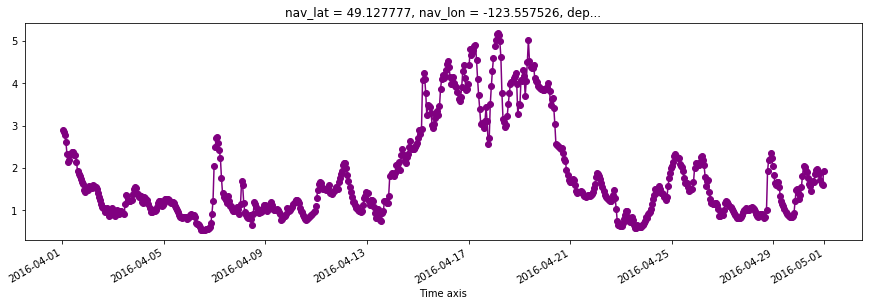

In [119]:
apr2016_snov2015_T1 = []
apr2016_snov2015_T1NO3 = []
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
for filename in sorted(glob.glob('/data/sallen/results/MEOPAR/tuning/01jan16/SalishSea_1h*ptrc_T_201604*.nc')):
    if '3-' in filename:
        print(filename)
    ds = xr.open_dataset(filename)
    data_extract = ds.isel(deptht = 0, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
    tphyto = data_extract.diatoms+data_extract.flagellates+data_extract.ciliates
    tphyto.plot(color='purple', marker='o')
    apr2016_snov2015_T1.append(tphyto)
    apr2016_snov2015_T1NO3.append(data_extract.nitrate)
    ds.close()

In [120]:
fileout = open('apr2016_snov2015_T1.pkl', 'wb')
print (fileout)
pickle.dump(apr2016_snov2015_T1, fileout)
fileout.close()

fileout = open('apr2016_snov2015_T1NO3.pkl', 'wb')
print (fileout)
pickle.dump(apr2016_snov2015_T1NO3, fileout)
fileout.close()

<_io.BufferedWriter name='apr2016_snov2015_T1.pkl'>
<_io.BufferedWriter name='apr2016_snov2015_T1NO3.pkl'>


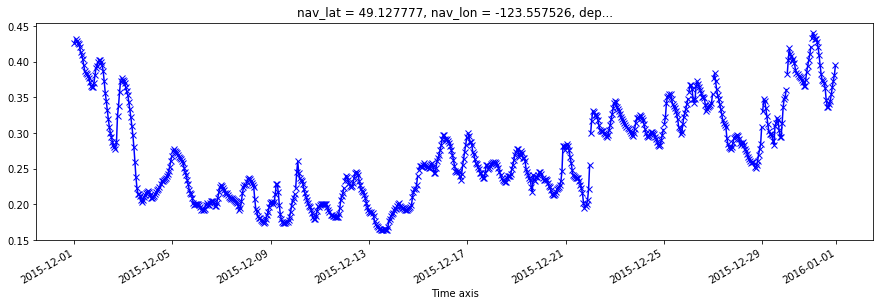

In [6]:
dec2015_base = []
dec2015NO3_base = []
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
for filename in sorted(glob.glob('/results2/SalishSea/nowcast-green.201905/??dec15/SalishSea_1h*ptrc_T*.nc')):
    data = xr.open_dataset(filename)
    data_extract = data.isel(deptht = 0, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
    tphyto = data_extract.diatoms+data_extract.flagellates+data_extract.ciliates
    tphyto.plot(color='blue', marker='x')
    dec2015_base.append(tphyto)
    dec2015NO3_base.append(data_extract.nitrate+0.*data_extract.silicon)
    data.close()

In [7]:
fileout = open('dec2015_base.pkl', 'wb')
print (fileout)
pickle.dump(dec2015_base, fileout)
fileout.close()
fileout = open('dec2015NO3_base.pkl', 'wb')
print (fileout)
pickle.dump(dec2015NO3_base, fileout)
fileout.close()

<_io.BufferedWriter name='dec2015_base.pkl'>
<_io.BufferedWriter name='dec2015NO3_base.pkl'>


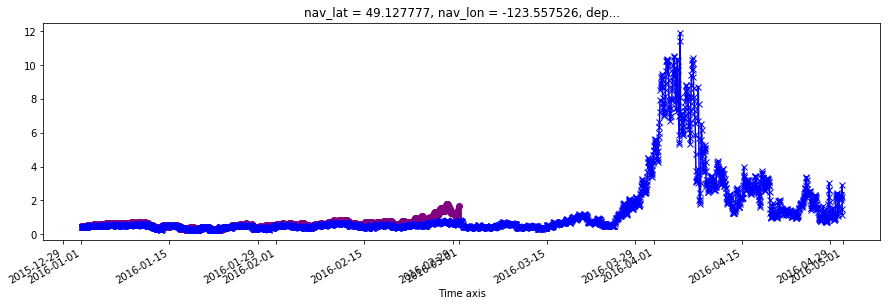

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
filein = open('janfebT1.pkl', 'rb')
janfebT1 = pickle.load(filein)
for i in range(len(janfebT1)):
    janfebT1[i].plot(marker='o', color='purple')
filein.close()
filein = open('janfebbase.pkl', 'rb')
janfebbase = pickle.load(filein)
for i in range(len(janfebbase)):
    janfebbase[i].plot(marker='x', color='blue')
filein.close()
filein = open('maraprbase.pkl', 'rb')
maraprbase = pickle.load(filein)
for i in range(len(maraprbase)):
    maraprbase[i].plot(marker='x', color='blue')
filein.close()